In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

In [2]:
#to use the url just pass it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)
#add all female races to the dictionary
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [3]:
from pandas.tools.plotting import scatter_matrix

In [4]:
for k in allmales:   ## FOR MALES
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


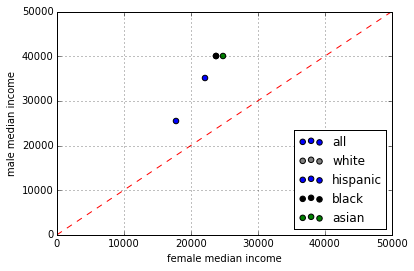

In [15]:
#female median income
salfemA = allfemales['all']['Median income'][1]
salfemW = allfemales['white']['Median income'][1]
salfemH = allfemales['hispanic']['Median income'][1]
salfemB = allfemales['white']['Median income'][1]
salfemY = allfemales['asian']['Median income'][1]
#malse median income
salmalA = allmales['all']['Median income'][1]
salmalW = allmales['white']['Median income'][1]
salmalH = allmales['hispanic']['Median income'][1]
salmalB = allmales['white']['Median income'][1]
salmalY = allmales['asian']['Median income'][1]
#plot all the female vs male median income dots
plt.scatter(salfemA, salmalA, s=30, c='b', label='all')
plt.scatter(salfemW, salmalW, s=30, c='grey', label='white')
plt.scatter(salfemH, salmalH, s=30, c='blue', label='hispanic')
plt.scatter(salfemB, salmalB, s=30, c='black', label='black')
plt.scatter(salfemY, salmalY, s=30, c='green', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.legend(loc=4)
#plot the dividing line
plt.plot((0,50000), (0,50000), 'r--')

In [16]:
X = [salfemA, salfemW, salfemH, salfemB, salfemY]
Y = [salmalA, salmalW, salmalH, salmalB, salmalY]
X1 = sm.add_constant(X, prepend = False)
model1 = sm.OLS(Y, X1).fit()
print model1.summary()
w1, w0 = model1.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 14 Oct 2015   Prob (F-statistic):            0.00152
Time:                        15:56:26   Log-Likelihood:                -40.962
No. Observations:                   5   AIC:                             85.92
Df Residuals:                       3   BIC:                             85.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.2576      0.202     11.204      0.0

In [22]:
print w1
print w0


2.25756505871
-14463.8477428


list

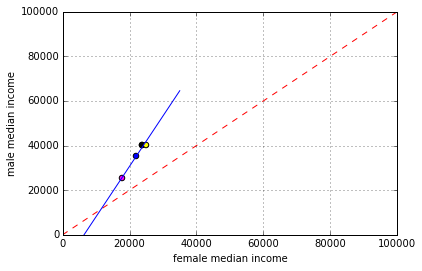

In [23]:
plt.scatter(salfA, salmA, s=30, c='b', label='all')
plt.scatter(salfW, salmW, s=30, c='grey', label='white')
plt.scatter(salfH, salmH, s=30, c='magenta', label='hispanic')
plt.scatter(salfB, salmB, s=30, c='black', label='black')
plt.scatter(salfY, salmY, s=30, c='yellow', label='asian')
plt.xlim((0, 100000))
plt.ylim((0, 100000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.plot((0,100000), (0,100000), 'r--')
xl = np.arange(0,35000,1)
#my new line
yl = w1*xl + w0
plt.plot(xl, yl, 'b')

In [9]:
cor = stats.spearmanr(Y, X)
np.std(Y)/np.std(X)
beta1=cor[0]*np.std(X)/np.std(Y)
beta0=np.mean(Y)-beta1*np.mean(X)

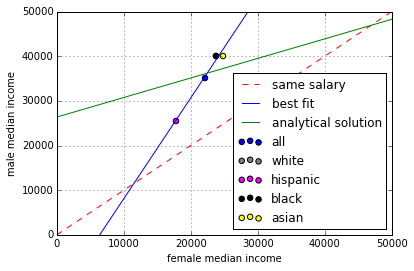

In [10]:
plt.scatter(salfA, salmA, s=30, c='b', label='all')
plt.scatter(salfW, salmW, s=30, c='grey', label='white')
plt.scatter(salfH, salmH, s=30, c='magenta', label='hispanic')
plt.scatter(salfB, salmB, s=30, c='black', label='black')
plt.scatter(salfY, salmY, s=30, c='yellow', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.plot((0,50000), (0,50000), 'r--', label='same salary')
xl = np.arange(0,50000,1)
#my new line
yl = w1*xl + w0
plt.plot(xl, yl, 'b', label='best fit')
#analytical solution
y2 = beta1*xl + beta0
plt.plot(xl, y2, 'g', label='analytical solution')
plt.legend(loc=4)

In [11]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [12]:
X2 = sm.add_constant(all_females[~all_females.mask], prepend = False)
Y1 = all_males[~all_males.mask]
model2 = sm.OLS(Y1, X2).fit()
print model2.summary()
b1, b0 = model2.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        15:45:05   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4110      0.043     32.787      0.0

In [27]:
print b1,b0

1.41097142164 -2.51703474961


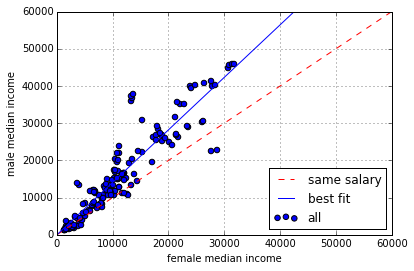

In [30]:

# plot it
plt.scatter(all_females, all_males, s=30, c='b', label='all')
plt.xlim((0, 60000))
plt.ylim((0, 60000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.plot((0,60000), (0,60000), 'r--', label='same salary')
xl = np.arange(0,60000,1)
#my new line
y3 = b1*xl + b0
plt.plot(xl, y3, 'b', label='best fit')
plt.legend(loc=4)

 # As is evident from the graph above , the median income of males is higher that female, yes we can also infer from the graph that not only the salary variation is as per the gender but also the races tends to fare differently .